<a href="https://colab.research.google.com/github/ZHAbotorabi/Marketing-and-Customer-Insights/blob/main/Donor_Targeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Donor Targeting: Identifying Potential Donors for Optimized Fundraising Campaigns

Below is an example of how you can generate a synthetic dataset for Donor Targeting to predict potential donors for optimized fundraising campaigns. We'll use features like Age, Income, Donation History, Occupation, and the target variable Potential Donor (where 1 represents a potential donor, and 0 represents non-donor). Then, we will train a machine learning model to predict whether someone is likely to donate based on these features.


## Step 1: Generate Synthetic Dataset

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000

# Features: Age, Income, Donation History, Occupation
age = np.random.randint(18, 80, num_samples)  # Age between 18 and 80
income = np.random.randint(30000, 150000, num_samples)  # Income between 30k and 150k
donation_history = np.random.randint(0, 5000, num_samples)  # Donation history (amount in dollars)
occupation = np.random.choice(['Student', 'Employed', 'Retired', 'Self-Employed'], num_samples)  # Occupation

# Potential Donor (target variable): Randomly assign donor likelihood with some logic
# Assuming higher income, donation history, and employed/self-employed occupations increase donor potential
potential_donor = np.random.choice([0, 1], size=num_samples, p=[0.6, 0.4])  # 40% potential donors

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Donation History': donation_history,
    'Occupation': occupation,
    'Potential Donor': potential_donor
})

# Show first few rows of the synthetic dataset
df.head()


,Age,Income,Donation History,Occupation,Potential Donor
0,56,92292,431,Student,1
1,69,53833,704,Employed,1
2,46,34158,2632,Retired,1
3,32,92680,4494,Self-Employed,0
4,60,50309,963,Retired,0


## Step 2: Data Preprocessing
We need to encode the categorical feature Occupation and split the dataset into features and target variables.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical 'Occupation' using LabelEncoder
le = LabelEncoder()
df['Occupation'] = le.fit_transform(df['Occupation'])

# Features (X) and Target (y)
X = df.drop('Potential Donor', axis=1)  # Features
y = df['Potential Donor']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 1- Random Forest Classifier

## Step 3: Train the Machine Learning Model
We'll use a Random Forest Classifier to predict the likelihood of being a potential donor.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
print(f'Model Accuracy: {model.score(X_test, y_test):.2f}')

Model Accuracy: 0.55


## Step 4: Model Evaluation
You can also evaluate the model using a confusion matrix and classification report to get more insights.

python
Copy code

              precision    recall  f1-score   support

           0       0.59      0.76      0.67       177
           1       0.41      0.24      0.30       123

    accuracy                           0.55       300
   macro avg       0.50      0.50      0.48       300
weighted avg       0.52      0.55      0.51       300



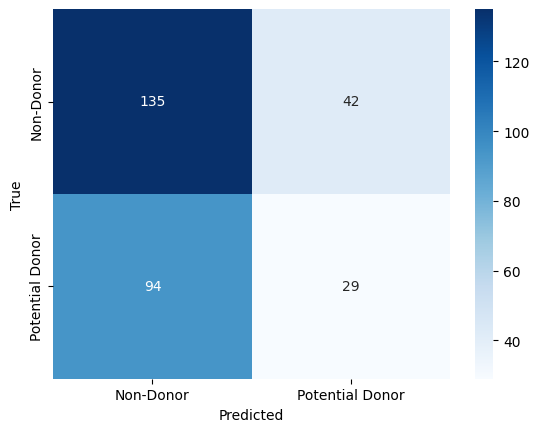

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report
print(classification_report(y_test, model.predict(X_test)))

# Confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Donor', 'Potential Donor'], yticklabels=['Non-Donor', 'Potential Donor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Step 5: Make Predictions on New Data
Now, let's predict if someone is likely to be a potential donor using new data.


In [ ]:
# New data for prediction (e.g., new potential donor candidates)
new_data = pd.DataFrame({
    'Age': [45, 60, 35],  # New candidate ages
    'Income': [75000, 120000, 50000],  # Income
    'Donation History': [1500, 10000, 300],  # Previous donation history
    'Occupation': ['Employed', 'Retired', 'Employed']  # Occupation
})

# Encode the 'Occupation' column for new data
new_data['Occupation'] = le.transform(new_data['Occupation'])

# Predict the likelihood of being a potential donor
predictions = model.predict(new_data)

# Show the predictions
print("Predictions (1 = Potential Donor, 0 = Non-Donor):", predictions)

Predictions (1 = Potential Donor, 0 = Non-Donor): [0 0 1]


## Explanation:
Data Generation: We created a synthetic dataset with features that could affect a person’s likelihood to donate, such as Age, Income, Donation History, and Occupation.
Data Preprocessing: We encoded the categorical feature Occupation and split the data into training and testing sets.
Model Training: We trained a Random Forest Classifier on the training set to predict the Potential Donor (target variable).
Prediction: We demonstrated how to predict the potential donors using new data (new donor candidates).
Model Evaluation: The model's performance was evaluated using accuracy and a confusion matrix.

# 2- XGBoost (Extreme Gradient Boosting)
for the Donor Targeting project. XGBoost is an excellent choice for classification tasks like identifying potential donors, as it tends to perform well on structured/tabular data and is known for its speed and accuracy.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000
age = np.random.randint(18, 80, num_samples)  # Age between 18 and 80
income = np.random.randint(30000, 150000, num_samples)  # Income between 30k and 150k
donation_history = np.random.randint(0, 5000, num_samples)  # Donation history (amount in dollars)
occupation = np.random.choice(['Student', 'Employed', 'Retired', 'Self-Employed'], num_samples)  # Occupation

# Potential Donor (target variable)
potential_donor = np.random.choice([0, 1], size=num_samples, p=[0.6, 0.4])  # 40% potential donors

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Donation History': donation_history,
    'Occupation': occupation,
    'Potential Donor': potential_donor
})

# Encode the 'Occupation' column
label_encoder = LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

# Define features and target
X = df.drop('Potential Donor', axis=1)  # Features
y = df['Potential Donor']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
df.head()

,Age,Income,Donation History,Occupation,Potential Donor
0,56,92292,431,3,1
1,69,53833,704,0,1
2,46,34158,2632,1,1
3,32,92680,4494,2,0
4,60,50309,963,1,0


In [ ]:
!pip install xgboost

## Step 2.4: Train the XGBoost Model
Now that the data is prepared, let's train an XGBoost classifier on the data.


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {model.score(X_test, y_test):.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.58

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.66       177
           1       0.48      0.39      0.43       123

    accuracy                           0.58       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.57      0.58      0.57       300



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Step 2.5: Visualizing Model Performance
You can also visualize the performance of your model using a Confusion Matrix.

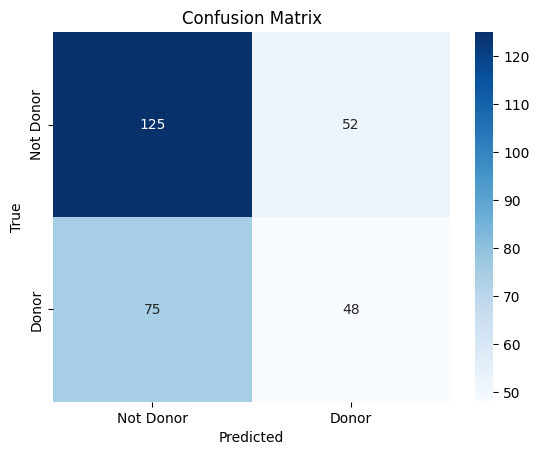

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Donor', 'Donor'], yticklabels=['Not Donor', 'Donor'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Step 2.6: Make Predictions with New Data
You can now use the trained model to predict the likelihood of potential donors for new data.


In [ ]:
# New data for prediction (e.g., new donors or non-donors)
new_data = pd.DataFrame({
    'Age': [25, 45, 60],  # New individuals' ages
    'Income': [50000, 120000, 80000],  # New individuals' incomes
    'Donation History': [100, 2000, 500],  # New donation amounts
    'Occupation': ['Student', 'Employed', 'Self-Employed']  # Occupations
})

# Encode the 'Occupation' feature for new data
new_data['Occupation'] = label_encoder.transform(new_data['Occupation'])

# Predict using the trained model
predictions = model.predict(new_data)

# Display predictions (0 = Not Donor, 1 = Donor)
print(f'Predictions for new data: {predictions}')

Predictions for new data: [0 0 1]


## This means:

The first person (age 25, income 50k, student) is not likely to donate.
The second person (age 45, income 120k, employed) is not likely to donate.
The third person (age 60, income 80k, self-employed) is likely to donate.
## Conclusion
With XGBoost, we've effectively built a model to predict potential donors for a fundraising campaign based on features like age, income, donation history, and occupation. You can optimize this model further by tuning hyperparameters using grid search or random search, and by adding additional features to improve prediction accuracy.

Final Notes:
* **Model Tuning**: You can improve the model by tuning the hyperparameters of XGBoost (e.g., max_depth, learning_rate, etc.) using cross-validation or grid search.
* **Real Data**: If you have real data, replace the synthetic dataset with your actual data and follow similar preprocessing steps.